In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df_1 = pd.read_csv("./udis.csv")
df_2 = pd.read_csv("./isiqa.csv")

df = pd.concat([df_1, df_2], keys=["UDIS", "ISIQA"], names=["source"])
# df.drop(columns=["level_1"])
df.reset_index(inplace=True)

In [20]:
df

,source,level_1,model,metrics_type,metrics_name,value
0,UDIS,0,LoFTR+ComplexAlpha,composition,ssim,0.919084
1,UDIS,1,LoFTR+ComplexAlpha,composition,mse,23.543102
2,UDIS,2,LoFTR+ComplexAlpha,composition,psnr,26.566176
3,UDIS,3,LoFTR+ComplexAlpha,composition,seam_score,5.478516
4,UDIS,4,LoFTR+ComplexAlpha,matching,auc,5.394382
...,...,...,...,...,...,...
14131,ISIQA,7135,UDIS2+UDIS2,composition,seam_score,16.672119
14132,ISIQA,7136,UDIS2+UDIS2,warp,ssim,0.233711
14133,ISIQA,7137,UDIS2+UDIS2,warp,mse,96.714343
14134,ISIQA,7138,UDIS2+UDIS2,warp,psnr,13.880252


In [35]:
graph_data = df[df["metrics_type"] == "warp"].groupby(["source", "model", "metrics_type", "metrics_name"], as_index=False)["value"].mean()


graph_data["model"] = graph_data["model"].str.replace("\+.*", "", regex=True)
graph_data.drop_duplicates(inplace=True)
graph_data.drop(columns=["metrics_type"], inplace=True)
graph_data


<>:4: SyntaxWarning: invalid escape sequence '\+'
<>:4: SyntaxWarning: invalid escape sequence '\+'
C:\Users\pavlo.butenko\AppData\Local\Temp\ipykernel_33056\1783841978.py:4: SyntaxWarning: invalid escape sequence '\+'
  graph_data["model"] = graph_data["model"].str.replace("\+.*", "", regex=True)


,source,model,metrics_name,value
0,ISIQA,AdaMatcher,mse,86.000386
1,ISIQA,AdaMatcher,psnr,16.916795
2,ISIQA,AdaMatcher,ssim,0.459858
6,ISIQA,LoFTR,mse,86.133527
7,ISIQA,LoFTR,psnr,16.905003
8,ISIQA,LoFTR,ssim,0.458108
12,ISIQA,SIFT,mse,85.827220
13,ISIQA,SIFT,psnr,17.025358
14,ISIQA,SIFT,ssim,0.462833
18,ISIQA,UDIS2,mse,86.827896


In [36]:
pivoted_df = graph_data.pivot_table(
    index=["source", "model"],  # Columns to keep as index
    columns="metrics_name",                               # Column to pivot
    values="value",                                       # Values to fill in
    aggfunc="first"                                       # Handle duplicates (if any)
).reset_index()  

In [52]:
tableUDIS = pivoted_df[pivoted_df["source"] == "ISIQA"]
tableUDIS.drop(columns=["source"], inplace=True)

# tableUDIS = tableUDIS.reset_index(drop=True)
tableUDIS.style.hide()

C:\Users\pavlo.butenko\AppData\Local\Temp\ipykernel_33056\2312524713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableUDIS.drop(columns=["source"], inplace=True)


model,mse,psnr,ssim
AdaMatcher,86.000386,16.916795,0.459858
LoFTR,86.133527,16.905003,0.458108
SIFT,85.827220,17.025358,0.462833
UDIS2,86.827896,16.304029,0.391521


In [ ]:
tableUDIS1 = tableUDIS[tableUDIS["metrics_name"] == "ssim"]
tableUDIS1.drop(columns=["metrics_name"], inplace=True)

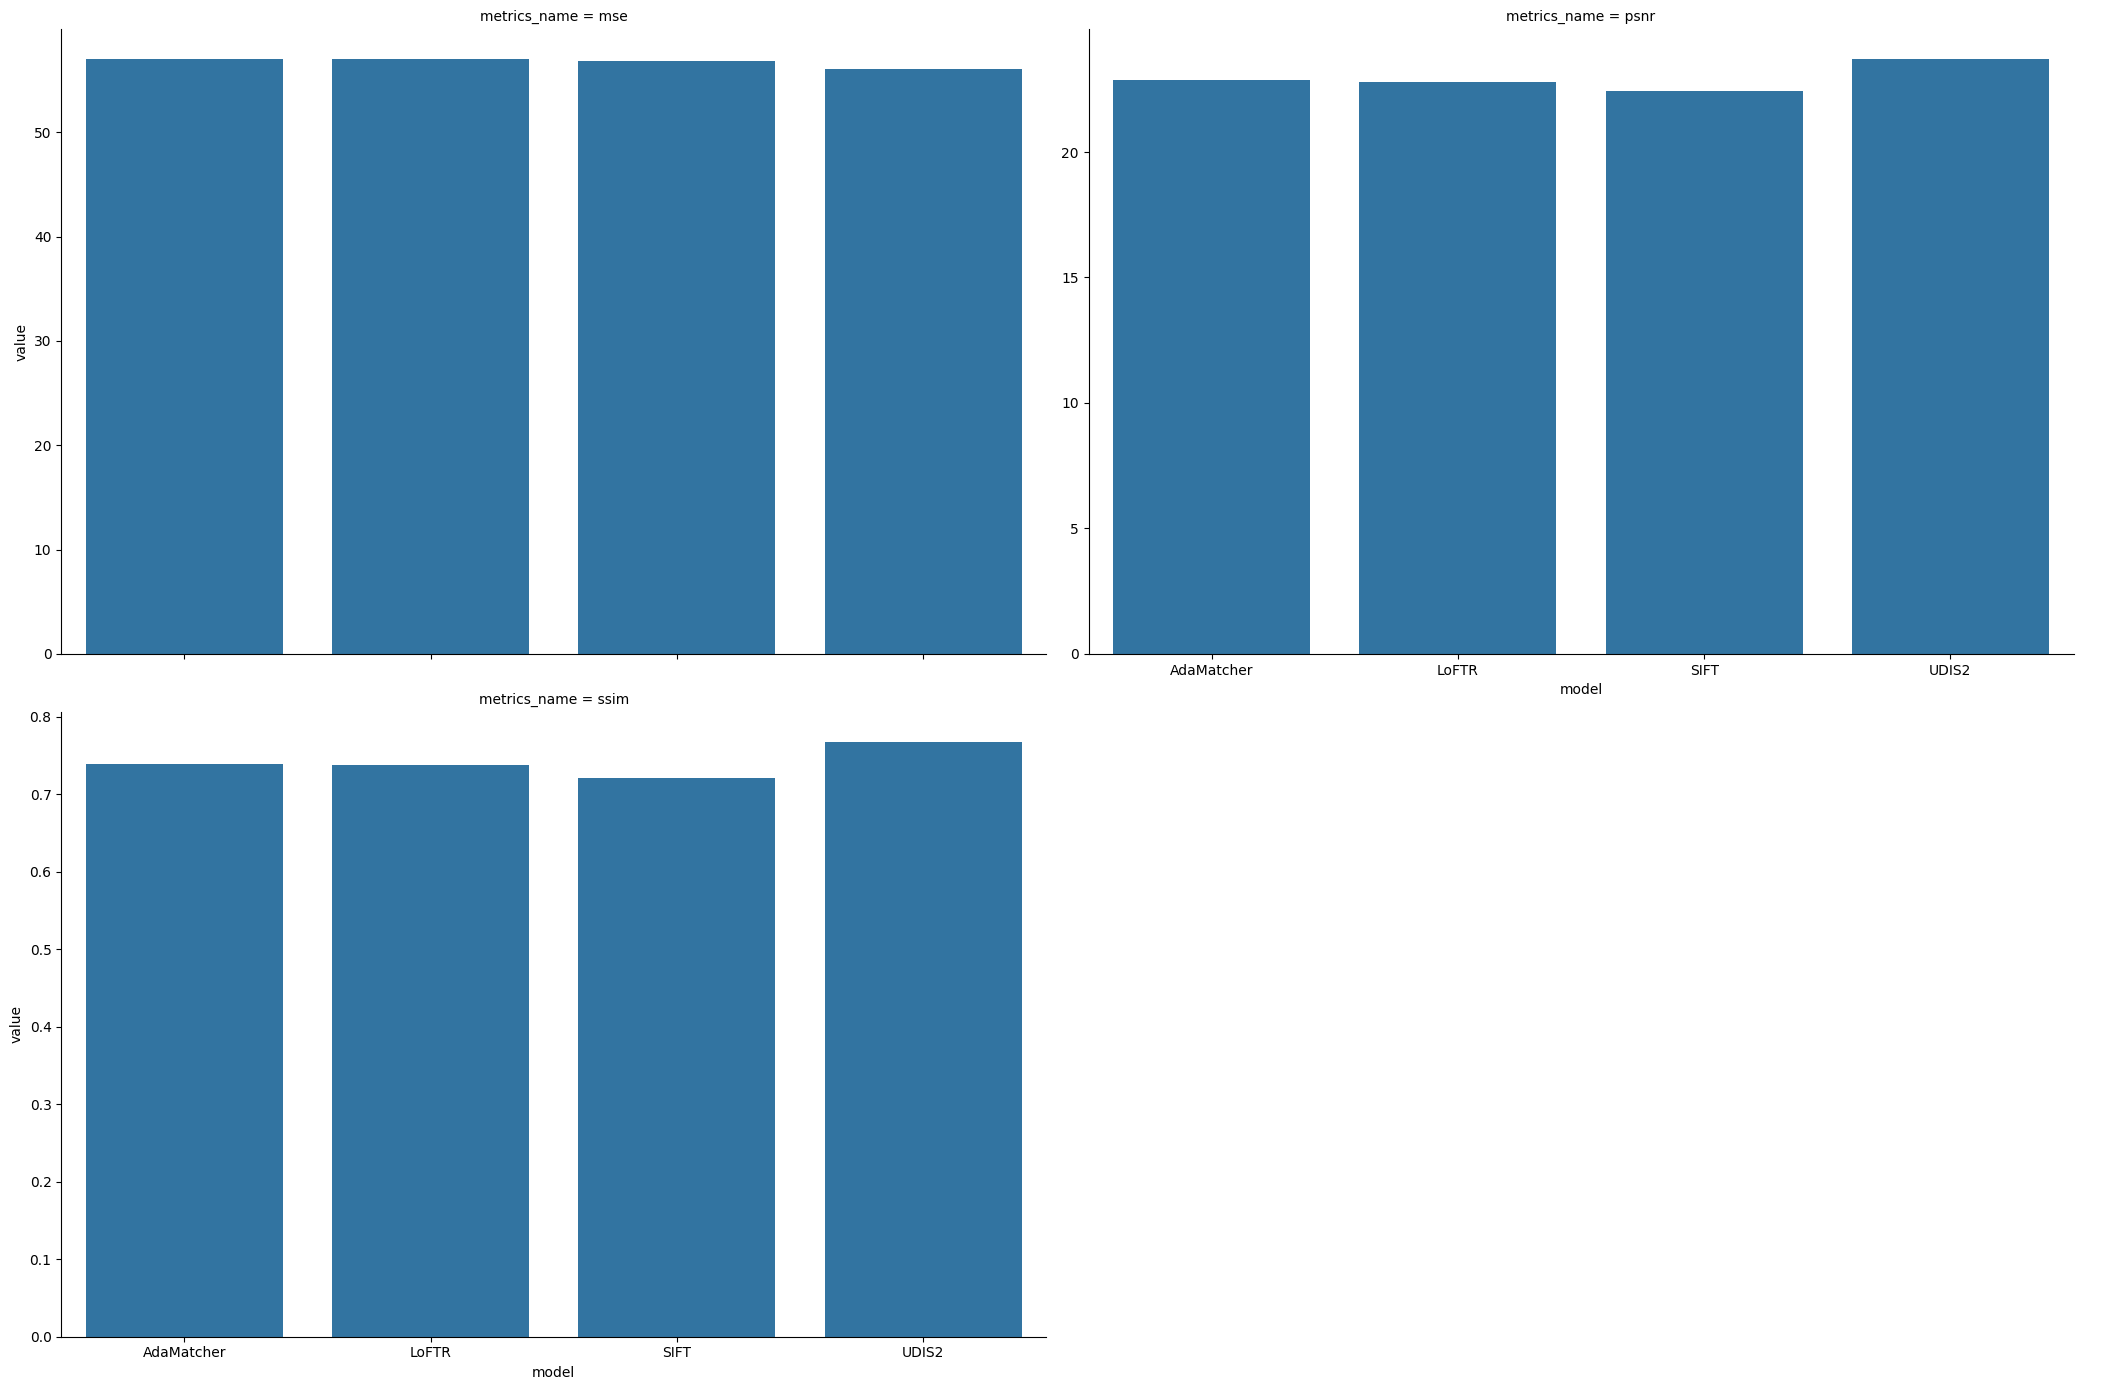

In [32]:
sns.catplot(graph_data[graph_data["source"] == "UDIS"], x="model",
                       y="value", col="metrics_name", kind="bar",
                       sharey=False, col_wrap=2, height=7, aspect=1.5)

plt.show()

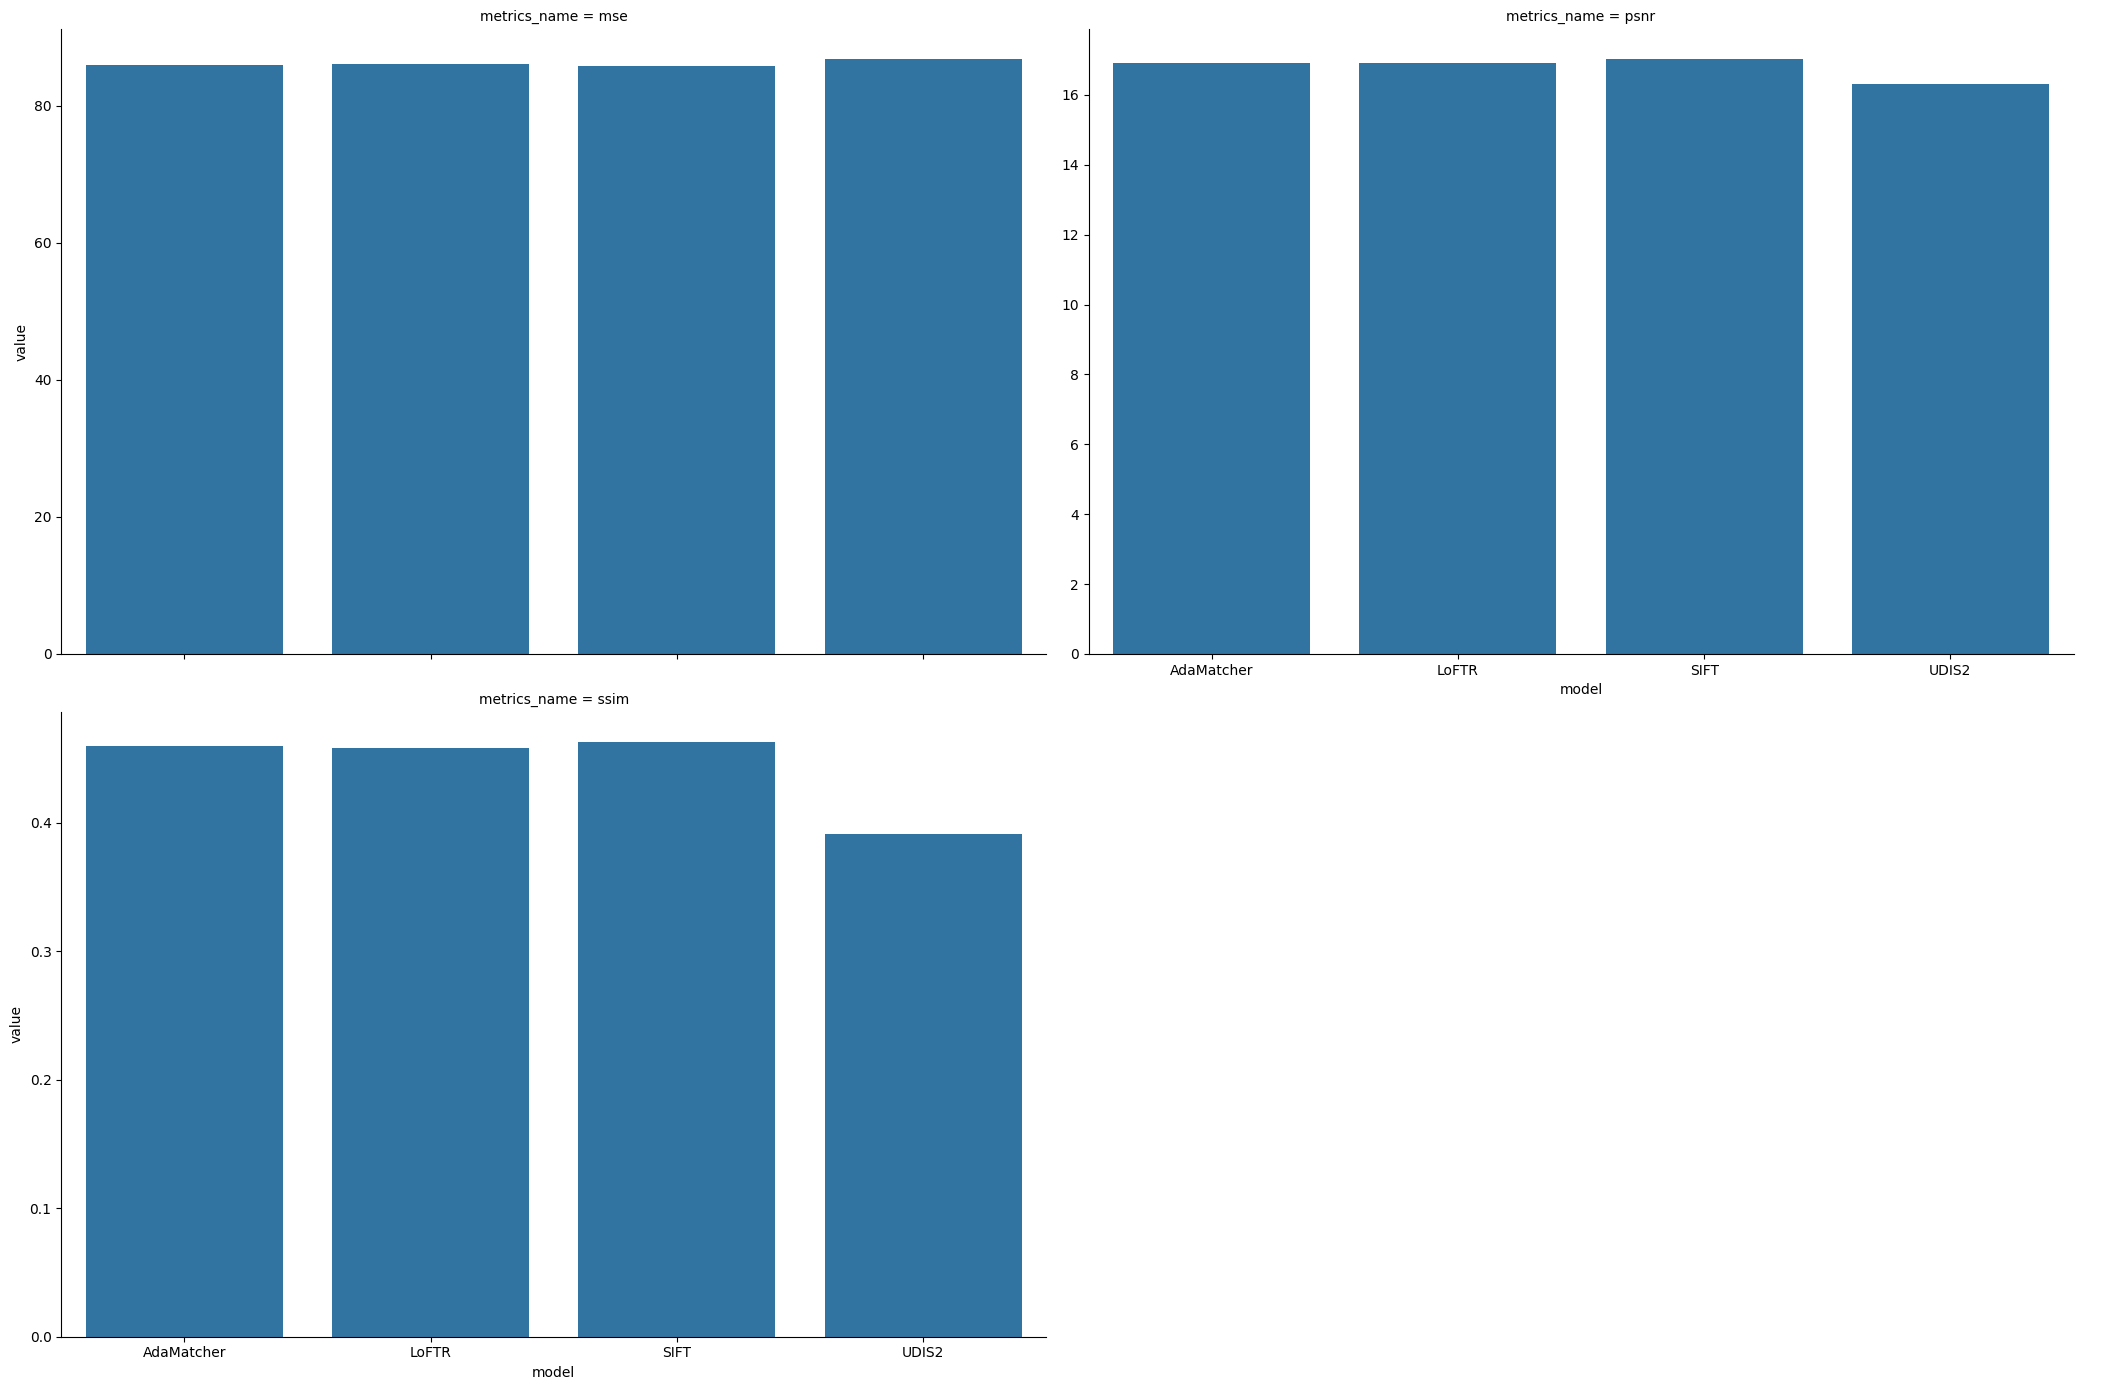

In [33]:
sns.catplot(graph_data[graph_data["source"] == "ISIQA"], x="model",
                       y="value", col="metrics_name", kind="bar",
                       sharey=False, col_wrap=2, height=7, aspect=1.5)

plt.show()